### Notation
In order to forecast using estimates from the delay distribution we develop the following notation. 


Suppose we have a time series $Y_1,Y_2,...,Y_n$ and a series of time points  $ T = t_1,t_2,...,t_j$ that we are interested in . We adopt the forecasting notation of Reich et. al (2018) in order to evaluate targets across models. We denote the fully observed data at time $j$ to be given by $\mathcal{Y_j}$.

Suppose we are interested in forecasting a target $z(t_j,k,L| \mathcal{Y_j})$ at time $t_j$. In general, since data are delayed in being reported, we are interested in forecasting relative to a timepoint in the past relative to $t_j$. For our purposes, we fix a lag $L$ as the number of timepoints we go backwards into the past from a given $t_j$ at which our forecasts "originate".


We define the following prediction $z(t_j, L , k | \mathcal{Y_j})$ to be the *k-step* ahead prediction relative to time $t_j$. For our initial experiments, we define $z(t_j, L, k | \mathcal{Y_j}) = \hat{Y_{t_j - L + k}}$, so that we can define the MSE of model $M$ to be 

$$MSE_{t_j}(M) = \frac{1}{L}\sum_{k=0}^L [\hat{Y_{t_j - L + k}} - Y_{j-L+k}]^2$$

In order to compute an average MSE over the full model $M$ we compute 

$$MSE(M) = \frac{1}{|T|}\sum_{t_j \in T}MSE_{t_j}(M)$$


For this experiment we examine 2 models 

$$M_1 = \text{ process model ignorning delay }$$

$$M_2 = \text{ process model weighted by delay distribution }$$


### Models

In this section we explore the difference between the two models, $M_1$ and $M_2$ more closely.


We define $M_1$ to be the "naive" model that ignores the delay distribution, and we define $M_2$ to be the model that incorporates the delay distribution. 

In order to accomodate delayed data into our set-up, we borrow the notation of Hole et all 2016. In particular, we extend our $\hat{Y_{t_j - L + k}}$ to take a second index $d$ which indicates the number of cases that occured on time $t_j - L + k$ and were reported within $d$ days later. Therefore, $d \in [0,...,D]$. For notational convience, we write $Y_{t,\infty}$ to mean the complete set of cases observed at time $t$.


We can now define the set of $k-step$ ahead forecasts from $k = [0,...,K]$ of model $1$ to be 

$$F_1 = [\hat{Y_{{t_j - L + 0},\infty}},\hat{Y_{{t_j - L + 1},\infty}}...\hat{Y_{{t_j - L + K},\infty}}]$$

That is, forecasts for the fully predicted incidence. 


Model 2 is able to incorporate the delay distribution in the following way.

Suppose we fit a delay distribution and obtain estimates $p_0,p_2,...,p_D$, that is, the $p_d$ percent of total cases are observed $d$ days after some reference time $t$.


If we observe some partially reported data at the $k-step$ ahead time point $Y_{{t - L +k},d}$ we can write the observation model as


$$Y_{{t - L +k},d} \sim Binomial(Y_{{t - L +k},\infty},\sum_{i=0}^{D-d} p_i)$$

where 

$$Y_{{t - L +k},\infty} \sim f$$

from a process model $f$ 

We can think of $f$ as a "prior" distribution to get at the posterior 

$$Y_{{t - L +k},\infty} | Y_{{t - L +k},d} \propto f *  Binomial(Y_{{t - L +k},\infty},\sum_{i=0}^{D-d} p_i)$$


We can approximate this posterior using any MCMC algorithm that we like. 

### Example

To make things more concrete we consider an example applied to Dengue incidence in Thailand province number 10. 

Let's first load the dataset.



In [1]:
data = []
with open ("province-biweek_with_delays.csv") as f:
        for line in f.readlines():
                data.append(line.replace("\n","").split(','))

province_10 = []

for dat in data:
        if dat[2] == "10":
                province_10.append(dat)

print (province_10)

[['2014', '1', '10', '85', '2014', '4'], ['2014', '1', '10', '8', '2014', '12'], ['2014', '1', '10', '1', '2014', '3'], ['2014', '1', '10', '79', '2014', '2'], ['2014', '2', '10', '1', '2014', '5'], ['2014', '2', '10', '186', '2014', '4'], ['2014', '2', '10', '5', '2014', '2'], ['2014', '2', '10', '5', '2014', '12'], ['2014', '2', '10', '6', '2014', '6'], ['2014', '3', '10', '3', '2014', '7'], ['2014', '3', '10', '1', '2015', '9'], ['2014', '3', '10', '9', '2014', '12'], ['2014', '3', '10', '75', '2014', '6'], ['2014', '3', '10', '1', '2014', '18'], ['2014', '3', '10', '102', '2014', '4'], ['2014', '4', '10', '121', '2014', '6'], ['2014', '4', '10', '2', '2014', '17'], ['2014', '4', '10', '17', '2014', '7'], ['2014', '4', '10', '1', '2014', '18'], ['2014', '4', '10', '4', '2014', '12'], ['2014', '5', '10', '1', '2014', '17'], ['2014', '5', '10', '3', '2014', '12'], ['2014', '5', '10', '1', '2015', '9'], ['2014', '5', '10', '1', '2014', '10'], ['2014', '5', '10', '23', '2014', '6'], ['2

Lets first take a look at all the dates where incidence occured.

In [2]:
import numpy as np
province_10 = np.array(province_10)
dates = np.unique(province_10[:,0:2],axis=0)
print (dates)

[['2014' '1']
 ['2014' '10']
 ['2014' '11']
 ['2014' '12']
 ['2014' '13']
 ['2014' '14']
 ['2014' '15']
 ['2014' '16']
 ['2014' '17']
 ['2014' '18']
 ['2014' '19']
 ['2014' '2']
 ['2014' '20']
 ['2014' '21']
 ['2014' '22']
 ['2014' '23']
 ['2014' '24']
 ['2014' '25']
 ['2014' '26']
 ['2014' '3']
 ['2014' '4']
 ['2014' '5']
 ['2014' '6']
 ['2014' '7']
 ['2014' '8']
 ['2014' '9']
 ['2015' '1']
 ['2015' '10']
 ['2015' '11']
 ['2015' '12']
 ['2015' '13']
 ['2015' '14']
 ['2015' '15']
 ['2015' '16']
 ['2015' '17']
 ['2015' '18']
 ['2015' '19']
 ['2015' '2']
 ['2015' '20']
 ['2015' '21']
 ['2015' '22']
 ['2015' '23']
 ['2015' '24']
 ['2015' '25']
 ['2015' '26']
 ['2015' '3']
 ['2015' '4']
 ['2015' '5']
 ['2015' '6']
 ['2015' '7']
 ['2015' '8']
 ['2015' '9']
 ['2016' '1']
 ['2016' '10']
 ['2016' '11']
 ['2016' '12']
 ['2016' '13']
 ['2016' '14']
 ['2016' '15']
 ['2016' '16']
 ['2016' '17']
 ['2016' '18']
 ['2016' '19']
 ['2016' '2']
 ['2016' '20']
 ['2016' '21']
 ['2016' '22']
 ['2016' '23']


Note these are sorted in lexographic order because they are strings. We have exactly 

In [3]:
print len(np.unique(province_10[:,0:2],axis=0))

78


Unique dates in the dataset. We can now map this to our notation. We have a time series 

$$Y_1,Y_2,.....,Y_{78}$$

For each $Y_i$ we consider a delay value $D$. To keep this simple to start with, let's fix $D=10$.

We can now construct a matrix of size $t_j, D$ or $78 x 10$ in order to fill in our reporting polygon.

In [4]:
reporting_polygon = np.zeros((78,10))

In order to correctly map dates into indeces we create the following dictionary by taking our dates object, converting it to an integer array, and sorting it.

In [5]:
date_index_dictionary = dict()
dates_as_num = []

def date_str_to_int(date):
        ## add a leading 0 in order for numeric sort to work
    date_int = 0
    if len(date[1]) == 1:
        date_int = int(date[0] + "0" +date[1])
    else:
        date_int = int(date[0] + date[1])
        
    return date_int

for date in dates:
    
    
    dates_as_num.append(date_str_to_int(date))
    
dates_as_num.sort()
i = 0
for date in dates_as_num:
    date_index_dictionary[date] = i
    i+=1
print (date_index_dictionary)

print (len(dates_as_num))


{201601: 52, 201602: 53, 201603: 54, 201604: 55, 201605: 56, 201606: 57, 201607: 58, 201608: 59, 201609: 60, 201610: 61, 201611: 62, 201612: 63, 201613: 64, 201614: 65, 201615: 66, 201616: 67, 201617: 68, 201618: 69, 201619: 70, 201620: 71, 201621: 72, 201622: 73, 201623: 74, 201624: 75, 201625: 76, 201626: 77, 201501: 26, 201502: 27, 201503: 28, 201504: 29, 201505: 30, 201506: 31, 201507: 32, 201508: 33, 201509: 34, 201510: 35, 201511: 36, 201512: 37, 201513: 38, 201514: 39, 201515: 40, 201516: 41, 201517: 42, 201518: 43, 201519: 44, 201520: 45, 201521: 46, 201522: 47, 201523: 48, 201524: 49, 201525: 50, 201526: 51, 201401: 0, 201402: 1, 201403: 2, 201404: 3, 201405: 4, 201406: 5, 201407: 6, 201408: 7, 201409: 8, 201410: 9, 201411: 10, 201412: 11, 201413: 12, 201414: 13, 201415: 14, 201416: 15, 201417: 16, 201418: 17, 201419: 18, 201420: 19, 201421: 20, 201422: 21, 201423: 22, 201424: 23, 201425: 24, 201426: 25}
78


We now have a list of sorted date numbers from 2014-01 to 2016-26. This will allow us to construct a complete reporting rectange of size 78*10

In [6]:
D = 10
for row in province_10:
    sick_date = date_str_to_int(row[:2])
    reported_date = date_str_to_int(row[4:])
    if reported_date <= 201626 and reported_date - sick_date < D:
        sick_date_index = date_index_dictionary[sick_date]
        reported_date_index = date_index_dictionary[reported_date]

        incidence = int(row[3])
        province = int(row[2])
        if province == 10 :
            reporting_polygon[sick_date_index][reported_date_index-sick_date_index] += incidence
    

print (reporting_polygon)


[[0.000e+00 7.900e+01 1.000e+00 8.500e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [5.000e+00 0.000e+00 1.860e+02 1.000e+00 6.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.020e+02 0.000e+00 7.500e+01 3.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 9.000e+00]
 [0.000e+00 0.000e+00 1.210e+02 1.700e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 4.000e+00 0.000e+00]
 [0.000e+00 2.300e+01 6.700e+01 3.000e+00 1.000e+00 1.000e+00 0.000e+00
  3.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 3.300e+01 8.300e+01 1.200e+01 2.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.400e+01 5.200e+01 1.000e+01 2.000e+00 2.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.000e+01 3.900e+01 3.200e+01 8.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.000e+00 4.000e+01 9.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 1.700e+01 6.900e+01 1.200e+01 3.000e+00 0.0

We now have our complete reporting polygon which can artifically create a trapezoid shape from. For instance if we choose a $t_j$ and $L$ we can create arbitrary reporting shapes as follows.

In [7]:
t_j = 50
L = 10

train_reporting_polygon = reporting_polygon[:t_j-L].tolist()

offset = 0
for i in range(t_j - L,t_j):
    train_reporting_polygon.append(reporting_polygon[i][:D-offset].tolist())
    offset+=1
    
train_reporting_polygon = np.array(train_reporting_polygon).tolist()
#print (train_reporting_polygon.shape)
print (train_reporting_polygon)

[[0.0, 79.0, 1.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 0.0, 186.0, 1.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 102.0, 0.0, 75.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0], [0.0, 0.0, 121.0, 17.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0], [0.0, 23.0, 67.0, 3.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0], [0.0, 33.0, 83.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 14.0, 52.0, 10.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0], [0.0, 10.0, 39.0, 32.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 40.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 17.0, 69.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 14.0, 51.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 30.0, 51.0, 0.0, 0.0, 22.0, 0.0, 0.0, 0.0, 0.0], [0.0, 27.0, 0.0, 0.0, 146.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 186.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 140.0, 60.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0], [0.0, 33.0, 126.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 43.0, 0.0, 149.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 148.0, 80.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 257.0

We see that we now have a descending trapezoid shape, we are ready to run some code! We set a range of $t_j$ values to plugin to our code in order to evaluate $M_1$ and $M_2$

In [8]:
total_cases = []
dates = []
i = 0
with open("province-biweek-counts.csv") as f:
    for line in f.readlines():
        if i >0 :
            total_cases.append(int(line.split(",")[-1]))
            dates.append(line.split(',')[-2])
        i = 1

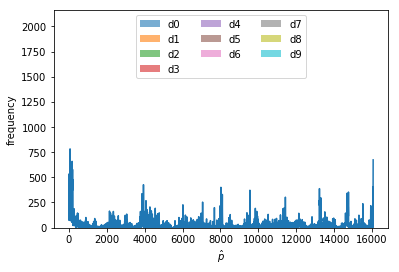

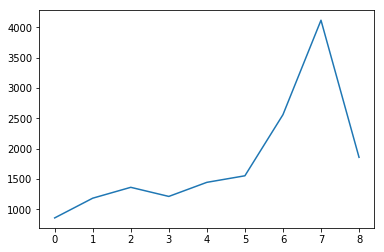

100%|██████████| 50500/50500 [00:16<00:00, 3075.83it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
import emcee
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error
from scipy.stats import binom,norm
import matplotlib.pyplot as plt


total_mse_m1 = 0
total_mse_m2 = 0
total_mse_m3 = 0

T = range(50,51)


def metropolis(iter_,n,p,n_hat):
    def p_dens(n,x,p,n_hat):
        return binom.pmf(n,x,p)*norm.pdf(x,n_hat,500)
    def r_g(x):
        return np.random.normal(x,1000)
   
    curr_counter = 0
    samples = [np.random.normal(n_hat,1)]
    while len(samples) < 100:
        proposal = r_g(samples[curr_counter])
        
        proposal_dens = p_dens(n,proposal,p,n_hat)/p_dens(n,samples[curr_counter],p,n_hat)
        if np.isinf(proposal_dens):
            proposal_dens = 1.1
        if np.isnan(proposal_dens):
            pass
        else:
            a_x = min(1,proposal_dens)
            u = np.random.uniform(0,1)
            #print (u,a_x)
            if u <= a_x:
                samples.append(proposal)
                curr_counter +=1
            
    return samples


for tau in T:
    
    t_j = tau
    L = D = 10

    train_reporting_polygon = reporting_polygon[:t_j-L].tolist()
    offset = 0
    for i in range(t_j - L,t_j):
        train_reporting_polygon.append(reporting_polygon[i][:D-offset].tolist())
        offset+=1

    train_reporting_polygon = np.array(train_reporting_polygon).tolist()
    #print (train_reporting_polygon.shape)

    train_n_t_d = train_reporting_polygon[:t_j-L]
    train_n_t_inf = np.array(train_reporting_polygon[:t_j-L]).sum(axis=1)
    
    #print (test_n_t_inf.shape)
    test_n_t_d = train_reporting_polygon[t_j-L:]
    test_n_t_inf = np.sum(reporting_polygon[t_j-L + 1:t_j],axis=1)
    plt.plot(np.hstack((total_cases,train_n_t_inf )))
    plt.show()
    plt.plot(test_n_t_inf)
    plt.show()
    import numpy as np
    import pymc3 as pm
    import pandas as pd


    ## Delay Model

    DELAY_DIST = True
    if DELAY_DIST == True:

        k = np.array(train_n_t_d).shape[1 ]

        with pm.Model() as multinom_test:
            a = pm.Dirichlet('a', a=np.ones(k))
            for i in range(len(train_n_t_d)):
                data_pred = pm.Multinomial('data_pred_%s'% i, n=sum(train_n_t_d[i]), p=a, observed=train_n_t_d[i])
            trace = pm.sample(50000, pm.Metropolis())
            #trace = pm.sample(1000) # also works with NUTS
#         from cycler import cycler
#         plt.xlabel('$\hat{p}$')
#         plt.ylabel('frequency')
#         for i in range(k):
#             plt.hist(trace['a'][:,i], bins=100, label='d{}'.format(i), alpha=0.6);
#         plt.legend(loc='upper center',
#           ncol=3)
#         plt.savefig("blah")
#         sys.exit()
    state_trajectories = []
    

   
    myDLM = dlm(train_n_t_inf)
    myDLM = myDLM + trend(1, name='lineTrend', w=1.0)
        # add a 7 day seasonality with prior covariance 1.0
    myDLM = myDLM + seasonality(52, name='7day', w=1.0)
        # add a 3 step auto regression
    myDLM = myDLM + autoReg(degree=2, data=train_n_t_inf, name='ar3', w=1.0)
    myDLM.fit()
    (predictMean, predictVar) = myDLM.predictN(N=D-1, date=myDLM.n-1)
    

    phat = trace['a'].mean(axis=0)
    count = 1 
    
    predictions_ = []
    for iter_ in range(len(predictMean)):
        row_sum = sum(test_n_t_d[iter_])
        pd = np.sum(phat[:len(phat)-count])
        #print (iter_,row_sum,pd,predictMean[iter_])

        trace = metropolis(iter_,row_sum,pd,predictMean[iter_])
        predictions_.append(np.mean(trace))
        count +=1
        
    print (mean_squared_error(predictMean,test_n_t_inf))
    print (mean_squared_error(predictions_,test_n_t_inf))
    total_mse_m1 += mean_squared_error(predictMean,test_n_t_inf)
    total_mse_m2 += mean_squared_error(predictions_,test_n_t_inf)


    

print "--------------\n\n\n"
print "MSE ignoring delay"
print (total_mse_m1/len(T))
print "MSE delay adjusted"
print (total_mse_m2/len(T))
print "MSE most likely trajectory"
print (total_mse_m3/len(T))

In [ ]:
1